
| Ticker      | Nome              | Tipo de dado               | Pode usar na matriz de Markowitz? | Observação importante                     |
|-------------|-------------------|----------------------------|------------------------------------|-------------------------------------------|
| ^BVSP       | IBOVESPA          | Nível do índice (pontos)   | ✅ Sim                             | Já está como “preço” diário               |
| ^GSPC       | S&P 500           | Nível do índice (pontos)   | ✅ Sim                             | Já está como “preço” diário               |
| ^TNX        | Treasury 10Y Yield| Yield (%)                  | ⚠️ Cautela ou evitar               | Não é um preço — é uma taxa de juros      |
| USDBRL=X    | Dólar/Real        | Taxa de câmbio             | ✅ Sim                             | Usar normalmente                          |
| EURBRL=X    | Euro/Real         | Taxa de câmbio             | ✅ Sim                             | Usar normalmente                          |


### IBOVESPA: Um Índice de Mercado

O IBOVESPA é um índice de mercado que representa uma carteira teórica de ações da B3. Ele funciona como um indicador do desempenho médio das ações mais negociadas e representativas do mercado brasileiro.

O “preço” do índice (exemplo: 121.248) pode ser interpretado como o “valor da cota” de uma carteira teórica. Assim como o preço de uma ação, o IBOVESPA flutua diariamente, subindo e descendo conforme as condições do mercado.

### 🔁 O que você precisa para a matriz de retornos?

Para realizar análises financeiras, como a construção de uma matriz de Markowitz, é necessário calcular uma série temporal de retornos logarítmicos. A fórmula para o retorno logarítmico é:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

Onde:
- \(P_t\): valor do índice no dia \(t\)
- \(r_t\): retorno logarítmico no dia \(t\)

Essa fórmula é aplicável não apenas para índices, mas também para ações, moedas e outros ativos financeiros, desde que você tenha uma sequência numérica coerente no tempo.

A imagem abaixo ilustra como os dados devem ser organizados para calcular os retornos:

```
Data       | Preço
-----------|--------
2023-08-01 | 121248
2023-08-02 | 120859
2023-08-03 | 120586
...
```

Com essa sequência, você pode calcular os retornos diários e utilizá-los em análises financeiras avançadas.


In [3]:
import pandas as pd

In [4]:
try:
    USDBRLX_1d = pd.read_csv('USDBRLX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para USDBRLX_1d")
except FileNotFoundError:
    print("❌ Arquivo USDBRLX_1d.csv não encontrado.")

✅ Dados carregados para USDBRLX_1d


In [5]:
usdbrl = USDBRLX_1d.copy()
usdbrl = usdbrl.reset_index() 
usdbrl.head(5)

,Date,Dólar/Real
0,2023-08-01 00:00:00+01:00,4.7247
1,2023-08-02 00:00:00+01:00,4.7920
2,2023-08-03 00:00:00+01:00,4.8104
3,2023-08-04 00:00:00+01:00,4.9164
4,2023-08-07 00:00:00+01:00,4.8854


In [6]:
usdbrl['Date'] = pd.to_datetime(usdbrl['Date'], utc=True)

# Converte para fuso local (ou remove)
usdbrl['Date'] = usdbrl['Date'].dt.tz_convert(None).dt.date

In [7]:
usdbrl.head(5)

,Date,Dólar/Real
0,2023-07-31,4.7247
1,2023-08-01,4.7920
2,2023-08-02,4.8104
3,2023-08-03,4.9164
4,2023-08-06,4.8854


In [8]:
try:
    EURBRLX_1d = pd.read_csv('EURBRLX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para EURBRLX_1d")
except FileNotFoundError:
    print("❌ Arquivo EURBRLX_1d.csv não encontrado.")

✅ Dados carregados para EURBRLX_1d


In [9]:
eurbrl = EURBRLX_1d.copy()
eurbrl = eurbrl.reset_index() 
eurbrl.head(5)

,Date,Euro/Real
0,2023-08-01 00:00:00+01:00,5.1952
1,2023-08-02 00:00:00+01:00,5.2556
2,2023-08-03 00:00:00+01:00,5.2530
3,2023-08-04 00:00:00+01:00,5.3571
4,2023-08-07 00:00:00+01:00,5.3579


In [10]:
eurbrl['Date'] = pd.to_datetime(eurbrl['Date'], utc=True)

# Converte para fuso local (ou remove)
eurbrl['Date'] = eurbrl['Date'].dt.tz_convert(None).dt.date

In [11]:
eurbrl.head(5)

,Date,Euro/Real
0,2023-07-31,5.1952
1,2023-08-01,5.2556
2,2023-08-02,5.2530
3,2023-08-03,5.3571
4,2023-08-06,5.3579


In [12]:
try:
    BVSP_1d = pd.read_csv('^BVSP_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para BVSP_1d")
except FileNotFoundError:
    print("❌ Arquivo BVSP_1d.csv não encontrado.")

✅ Dados carregados para BVSP_1d


In [13]:
ibov = BVSP_1d.copy()
ibov = ibov.reset_index() 
ibov.head(5)

,Date,IBOVESPA
0,2023-08-01 00:00:00-03:00,121248.0
1,2023-08-02 00:00:00-03:00,120859.0
2,2023-08-03 00:00:00-03:00,120586.0
3,2023-08-04 00:00:00-03:00,119508.0
4,2023-08-07 00:00:00-03:00,119380.0


In [14]:
ibov['Date'] = pd.to_datetime(ibov['Date'], utc=True)

# Converte para fuso local (ou remove)
ibov['Date'] = ibov['Date'].dt.tz_convert(None).dt.date

In [15]:
ibov.head(5)

,Date,IBOVESPA
0,2023-08-01,121248.0
1,2023-08-02,120859.0
2,2023-08-03,120586.0
3,2023-08-04,119508.0
4,2023-08-07,119380.0


In [16]:
try:
    GSPC_1d = pd.read_csv('^GSPC_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para GSPC_1d")
except FileNotFoundError:
    print("❌ Arquivo GSPC_1d.csv não encontrado.")

✅ Dados carregados para GSPC_1d


In [17]:
sep = GSPC_1d.copy()
sep = sep.reset_index() 
sep.head(5)

,Date,S&P 500
0,2023-08-01 00:00:00-04:00,4576.729980
1,2023-08-02 00:00:00-04:00,4513.390137
2,2023-08-03 00:00:00-04:00,4501.890137
3,2023-08-04 00:00:00-04:00,4478.029785
4,2023-08-07 00:00:00-04:00,4518.439941


In [18]:
# Força a conversão para datetime, tratando timezone corretamente
sep['Date'] = pd.to_datetime(sep['Date'], utc=True)

# Converte para fuso local (ou remove)
sep['Date'] = sep['Date'].dt.tz_convert(None).dt.date


In [19]:
sep.head(5)

,Date,S&P 500
0,2023-08-01,4576.729980
1,2023-08-02,4513.390137
2,2023-08-03,4501.890137
3,2023-08-04,4478.029785
4,2023-08-07,4518.439941


In [20]:
try:
    TNX_1d = pd.read_csv('^TNX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para TNX_1d")
except FileNotFoundError:
    print("❌ Arquivo TNX_1d.csv não encontrado.")

✅ Dados carregados para TNX_1d


In [21]:
TNX_1d.head(5)

,Treasury 10Y Yield
Date,
2023-08-01 00:00:00-05:00,4.051
2023-08-02 00:00:00-05:00,4.078
2023-08-03 00:00:00-05:00,4.189
2023-08-04 00:00:00-05:00,4.060
2023-08-07 00:00:00-05:00,4.078


In [22]:
# Converter 'Date' para índice comum
ibov.set_index('Date', inplace=True)
eurbrl.set_index('Date', inplace=True)
usdbrl.set_index('Date', inplace=True)
sep.set_index('Date', inplace=True)
# Concatenar ao longo das colunas
df_concat = pd.concat([ibov, sep, eurbrl, usdbrl], axis=1).dropna().reset_index()


In [23]:
df_concat.head(5)

,Date,IBOVESPA,S&P 500,Euro/Real,Dólar/Real
0,2023-08-01,121248.0,4576.729980,5.2556,4.7920
1,2023-08-02,120859.0,4513.390137,5.2530,4.8104
2,2023-08-03,120586.0,4501.890137,5.3571,4.9164
3,2023-08-07,119380.0,4518.439941,5.3825,4.8990
4,2023-08-08,119090.0,4499.379883,5.3615,4.8986


### Matriz de Markwitz


In [24]:
import numpy as np

In [25]:
precos = df_concat.drop(columns='Date')
retornos = np.log(precos / precos.shift(1)).dropna()

In [32]:
media_retornos = retornos.mean() * 252  # Retorno médio diário, e o PyPortfolioOpt interpreta ele como anual.
matriz_cov = retornos.cov()
matriz_corr = retornos.corr()

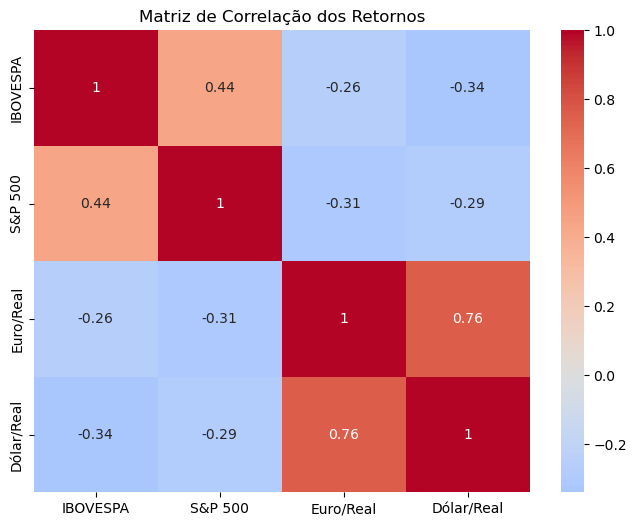

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação dos Retornos")
plt.show()


In [34]:
!pip install PyPortfolioOpt
from pypfopt import EfficientFrontier

In [35]:
# Inicializa a fronteira eficiente
ef = EfficientFrontier(media_retornos, matriz_cov)

In [36]:
# Otimiza a carteira para máximo Sharpe Ratio
pesos = ef.max_sharpe()

In [37]:
# Exibe os pesos calculados
limpos = ef.clean_weights()
print("Pesos ótimos:\n", limpos)

# Desempenho estimado da carteira
ret, vol, sharpe = ef.portfolio_performance(verbose=True)

Pesos ótimos:
 OrderedDict({'IBOVESPA': 0.01852, 'S&P 500': 0.47625, 'Euro/Real': 0.44832, 'Dólar/Real': 0.05691})
Expected annual return: 15.1%
Annual volatility: 0.6%
Sharpe Ratio: 26.54


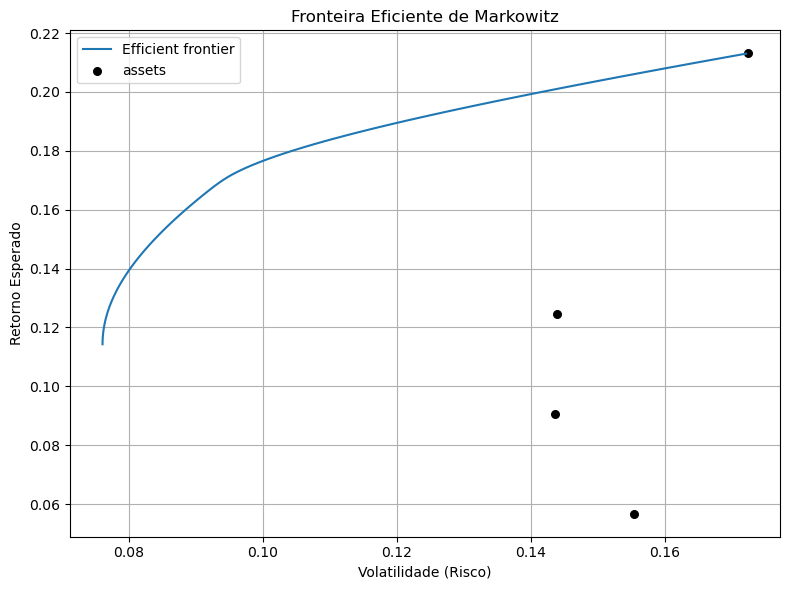

In [40]:
from pypfopt import EfficientFrontier, expected_returns, risk_models
from pypfopt.plotting import plot_efficient_frontier
import matplotlib.pyplot as plt

# Supondo que 'precos' já está definido corretamente
mu = expected_returns.mean_historical_return(precos)
S = risk_models.sample_cov(precos)

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(8,6))
plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.title("Fronteira Eficiente de Markowitz")
plt.xlabel("Volatilidade (Risco)")
plt.ylabel("Retorno Esperado")
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
from pypfopt.plotting import plot_efficient_frontier, plot_weights

ret, vol, sharpe = ef.portfolio_performance()
ax.scatter(vol, ret, marker="*", s=100, c="r", label="Máx. Sharpe")


In [42]:
pesos_otimos = ef.clean_weights()
print(pesos_otimos)


OrderedDict({'IBOVESPA': 0.0, 'S&P 500': 0.99883, 'Euro/Real': 0.00119, 'Dólar/Real': 0.0})
